In [60]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:

data_folders = [f for f in os.listdir('data') if os.path.isdir(os.path.join('data', f))]

dfs = []

for folder in data_folders:
    file_path = os.path.join('data', folder, 'projectinfo.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['source_folder'] = folder
        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True, sort=False)


In [62]:
print("Shape of merged dataframe:", merged_df.shape)
pd.set_option('display.max_columns', None)
merged_df.sample(10)

Shape of merged dataframe: (3692, 38)


,project_name,status,location,Project uses,Floors (above ground),Podium,Construction type,Parking spaces,Office space (sqft),source_folder,Developer,Architect,# of apartments,Architects,Height (ft),Floors (below),Consultant,# of rooms,# of condos,Retail space (sqft),Podium floors,Developers,Construction,General Contractor,Electrical - low voltage,Engineers,Landscape design/architect,Electrical - low voltages,Consultants,Property management,Interior design,Engineer,Lender,Lenders,Landscape design/architects,Constructions,CRE Broker,CRE Brokers
3660,Empire at Fairfax,Under construction,"7905 Romaine St West Hollywood, CA 90046","['Apartments', 'Retail', 'Parking']",5.0,Yes,Type 3 4 5,NaN,NaN,e56cd3df_empire-at-fairfax,['Empire Property Group'],['Levin-Morris Architects'],34.0,NaN,NaN,NaN,NaN,NaN,NaN,"1,500",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,Libbit Apartments,Proposed,"4741 Libbit Ave Los Angeles, CA 91436","['Apartments', 'Parking']",5.0,Yes,Type 2,60.0,NaN,35255142_libbit-apartments,['Precision Development LLC'],['I Elements'],46.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3417,Central Metro Place,Under construction,"14513 Central Avenue Baldwin Park, CA 91706",['Apartments'],4.0,No,Type 3 4 5,NaN,NaN,c754e6b3_central-metro-place,['Retirement Housing Foundation'],['Birbagroup Architects'],54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,2515 W Olympic Boulevard,Proposed,"2515 West Olympic Boulevard Los Angeles, CA...","['Apartments', 'Retail', 'Parking']",7.0,No,Type 3 4 5,228.0,NaN,ab07d7b1_2515-w-olympic-boulevard,['N.Y. Properties'],NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,"36,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,601 Colorado Avenue,Proposed,"601 Colorado Ave Santa Monica, CA 90401","['Apartments', 'Retail', 'Parking']",24.0,Yes,Type 1 2,103.0,NaN,8a3490ad_601-colorado-avenue,NaN,NaN,264.0,"['Michael W. Folonis Architects', 'Ottinger Ar...",260.0,2.0,['Rand Paster Nelson LLP'],NaN,NaN,"4,200",NaN,"['WS Communities', 'Madison Realty Capital']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1812,1135 W. 7th Street,Proposed,"1135 W 7th St Los Angeles, CA 90057","['Apartments', 'Retail', 'Parking']",25.0,Yes,Type 1,323.0,NaN,1a0f62a1_1135-w-7th-street,['SEVEN Street Properties LLC'],['Harley Ellis Devereaux'],225.0,NaN,NaN,NaN,NaN,NaN,NaN,"7,200",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,El Centro on Hollywood,Completed,"6200 Hollywood Blvd Los Angeles, CA 90028","['Apartments', 'Retail', 'Parking']",7.0,Yes,Type 2,NaN,NaN,47406230_el-centro-on-hollywood,['Clarett West'],['VTBS Architects'],507.0,NaN,NaN,NaN,NaN,NaN,NaN,"60,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['DLJ Real Estate Capital Partners', 'Western ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3358,627 North Juanita Avenue,Proposed,"627 North Juanita Avenue Los Angeles, CA 90004",['Townhomes'],1.0,No,Type 3 4 5,NaN,NaN,8d09a516_627-north-juanita-avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['627 Juan LLC', 'Barth Partners']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,717 Lyon Street,Proposed,"717 Lyon Street Santa Ana, CA 92705","['Townhomes', 'Parking']",3.0,No,Type 3 4 5,105.0,NaN,6b7f0c6f_717-lyon-street,['Warmington Residential'],['KTGY Architecture + Planning'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,1026 E. 4th Street,Proposed,"1026 East 4th Street Santa Ana, CA 92701","['Townhomes', 'SFH']",3.0,No,Type 3 4 5,NaN,NaN,3ab77876_1026-e-4th-street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# merged_df.to_csv('merged_data.csv', index=False)

In [64]:
# Clean up the 'Project uses' column by removing brackets and single quotes
merged_df['Project uses'] = merged_df['Project uses'].fillna('')  # Handle NaN values
merged_df['Project uses'] = merged_df['Project uses'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", "")

# Split the string into a list of uses and strip whitespace
merged_df['Project uses'] = merged_df['Project uses'].str.split(',')
merged_df['Project uses'] = merged_df['Project uses'].apply(lambda x: [use.strip() for use in x])

# Get unique project uses across all rows
all_uses = set()
for uses in merged_df['Project uses']:
    all_uses.update(uses)
all_uses.discard('')  # Remove empty string if present

# Create binary columns for each project use
for use in all_uses:
    col_name = f'use_{use.lower().replace(" ", "_")}'
    merged_df[col_name] = merged_df['Project uses'].apply(lambda x: 1 if use in x else 0)


In [65]:
print("Shape of merged dataframe:", merged_df.shape)
pd.set_option('display.max_columns', None)
merged_df.sample(10)

Shape of merged dataframe: (3692, 50)


,project_name,status,location,Project uses,Floors (above ground),Podium,Construction type,Parking spaces,Office space (sqft),source_folder,Developer,Architect,# of apartments,Architects,Height (ft),Floors (below),Consultant,# of rooms,# of condos,Retail space (sqft),Podium floors,Developers,Construction,General Contractor,Electrical - low voltage,Engineers,Landscape design/architect,Electrical - low voltages,Consultants,Property management,Interior design,Engineer,Lender,Lenders,Landscape design/architects,Constructions,CRE Broker,CRE Brokers,use_medical,use_parking,use_hotel,use_office,use_cultural,use_sfh,use_transportation,use_greenspace,use_condos,use_retail,use_apartments,use_townhomes
524,3702 W. Jefferson Boulevard,Proposed,"3702 W Jefferson Blvd Los Angeles, CA 90016","[Apartments, Retail, Parking]",4.0,No,Type 2,NaN,NaN,802da5dc_3702-w-jefferson-boulevard,['Branmark Group'],NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,"5,900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,1,1,0
1689,AMP Lofts,Completed,"695 S Santa Fe Ave Los Angeles, CA 90021","[Apartments, Retail, Parking]",7.0,Yes,Type 2,420.0,NaN,16a52053_amp-lofts,['Greystar Real Estate Partners'],['Shimoda Design Group'],320.0,NaN,NaN,NaN,NaN,NaN,NaN,"20,000",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Steinberg Hart', 'Bolour Associates']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,1,1,0
3320,1244 Innes Avenue,Under construction,"1244 Innes Avenue Los Angeles, CA 90026","[Apartments, Parking]",2.0,No,Type 2,NaN,NaN,262fcd49_1244-innes-avenue,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,1,0
1873,Terrace Block,Approved,"550 Shatto Pl Los Angeles, CA 90020","[Apartments, Retail, Office, Parking]",40.0,No,Type 1 2,470.0,NaN,52afa6ed_terrace-block,NaN,['Gensler'],367.0,NaN,483.0,4.0,NaN,NaN,NaN,"34,000",NaN,"['Townline', 'Forme Development', 'Urban Offer...",NaN,NaN,NaN,NaN,NaN,NaN,"['Irvine & Associates', 'Armbruster Goldsmith ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,0,0,1,1,0
1748,Beach Cities Health District Campus,Proposed,"514 N Prospect Ave Redondo Beach, CA 90277","[Apartments, Medical, Parking, Greenspace]",4.0,No,Type 2,830.0,NaN,05e7a3dd_beach-cities-health-district-campus,['Beach Cities Health District'],['Paul Murdoch Architects'],220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,1,0,0,1,0
1079,Cambria Hotel South Park,Approved,"908 Georgia St Los Angeles, CA 90015","[Retail, Hotel, Parking]",18.0,No,Type 1,51.0,NaN,a863c033_cambria-hotel-south-park,NaN,['Architects Orange'],NaN,NaN,206.0,NaN,NaN,247,NaN,"1,821",NaN,"['Sun Capital', 'Pacific Property Partners']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,0,0,1,0,0
662,Cadence Apartments,Completed,"11408 S Central Ave Los Angeles, CA 90059",[Apartments],4.0,No,Type 3 4 5,NaN,NaN,fda3af0e_cadence-apartments,['LINC Housing Corporation'],['Lahmon Architects'],64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Alchemy Planning + Land Use', 'Walton Constr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0
1644,The Astra,Completed,"215 East Regent Street Inglewood, CA 90301","[Apartments, Retail, Parking]",6.0,No,Type 3 4 5,438.0,NaN,c21ea672_the-astra,['Thomas Safran & Associates'],['Withee Malcolm Architects'],242.0,NaN,NaN,NaN,['Milender White Construction'],NaN,NaN,"48,000",NaN,NaN,NaN,['Milender White Construction'],"['Lavitech Solutions, Inc.']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,1,1,0
647,3101 W Exposition Boulevard,Completed,"3101 West Exposition Boulevard Los Angeles,...","[Office, Parking]",4.0,No,Type 3 4 5,NaN,"94,000",ba1a3280_3101-w-exposition-boulevard,['The Luzzato Company'],['HLW International'],NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

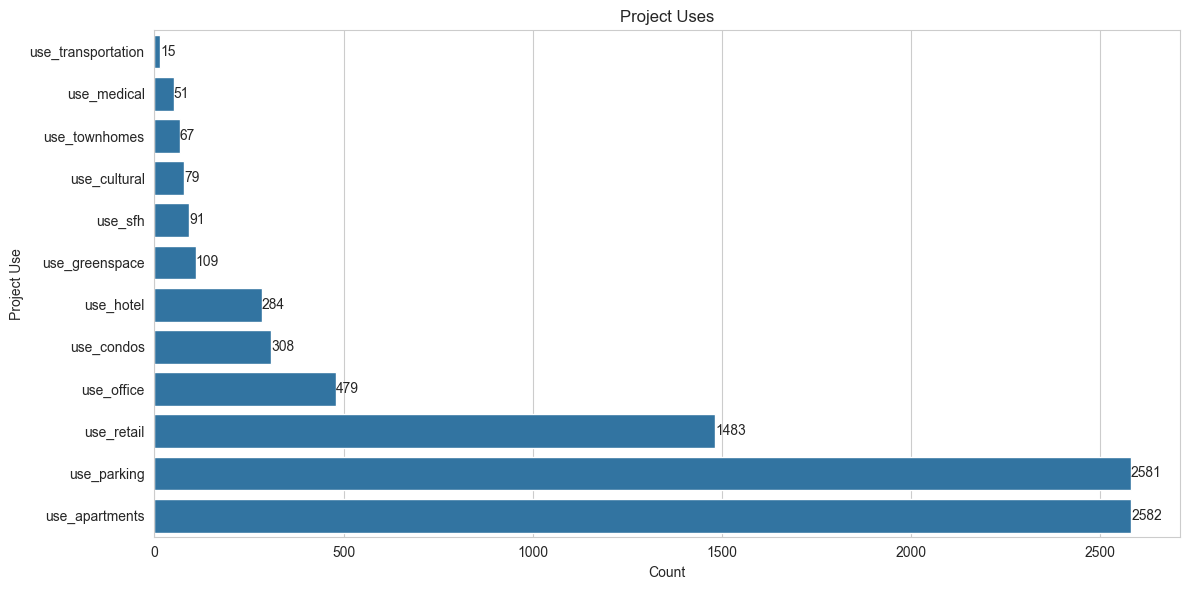

In [66]:
use_columns = [col for col in merged_df.columns if col.startswith('use_')]

frequencies = merged_df[use_columns].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))

sns.barplot(x=frequencies.values, y=frequencies.index)
plt.title('Project Uses')
plt.xlabel('Count')
plt.ylabel('Project Use')

for i, v in enumerate(frequencies.values):
    plt.text(v + 0.5, i, str(int(v)), va='center')

plt.tight_layout()
plt.show()

In [67]:
# create multifamily column
merged_df['multifamily'] = ((merged_df['use_sfh'] == 1) | 
                           (merged_df['use_condos'] == 1) |
                           (merged_df['use_apartments'] == 1) |
                           (merged_df['use_townhomes'] == 1)).astype(int)


In [68]:
# Merge Architect and Architects columns
merged_df['Architect'] = merged_df['Architect'].fillna(merged_df['Architects'])
merged_df.drop('Architects', axis=1, inplace=True)


In [69]:
# Merge Developer and Developers columns
merged_df['Developer'] = merged_df['Developer'].fillna(merged_df['Developers'])
merged_df.drop('Developers', axis=1, inplace=True)


In [70]:
# Filter for multifamily projects
multifamily_df = merged_df[merged_df['multifamily'] == 1]

multifamily_df['Architect'] = multifamily_df['Architect'].str.strip('[]').str.split(',')
architect_counts = multifamily_df.explode('Architect')['Architect'].str.strip().str.strip("'").value_counts()

multifamily_df['Developer'] = multifamily_df['Developer'].str.strip('[]').str.split(',')
developer_counts = multifamily_df.explode('Developer')['Developer'].str.strip().str.strip("'").value_counts()

architect_counts.to_csv('architect_counts.csv')
developer_counts.to_csv('developer_counts.csv')

/var/folders/w4/8bdyf7817wzghq2ypzxtqpcm0000gn/T/ipykernel_88827/3955425097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifamily_df['Architect'] = multifamily_df['Architect'].str.strip('[]').str.split(',')
/var/folders/w4/8bdyf7817wzghq2ypzxtqpcm0000gn/T/ipykernel_88827/3955425097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifamily_df['Developer'] = multifamily_df['Developer'].str.strip('[]').str.split(',')


In [72]:
multifamily_df['housing_units'] = multifamily_df.apply(lambda x: float('nan') if pd.isna(x['# of apartments']) and pd.isna(x['# of condos']) else (0 if pd.isna(x['# of apartments']) else x['# of apartments']) + (0 if pd.isna(x['# of condos']) else x['# of condos']), axis=1)



/var/folders/w4/8bdyf7817wzghq2ypzxtqpcm0000gn/T/ipykernel_88827/2109818373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multifamily_df['housing_units'] = multifamily_df.apply(lambda x: float('nan') if pd.isna(x['# of apartments']) and pd.isna(x['# of condos']) else (0 if pd.isna(x['# of apartments']) else x['# of apartments']) + (0 if pd.isna(x['# of condos']) else x['# of condos']), axis=1)


Maximum housing units: 3750.0


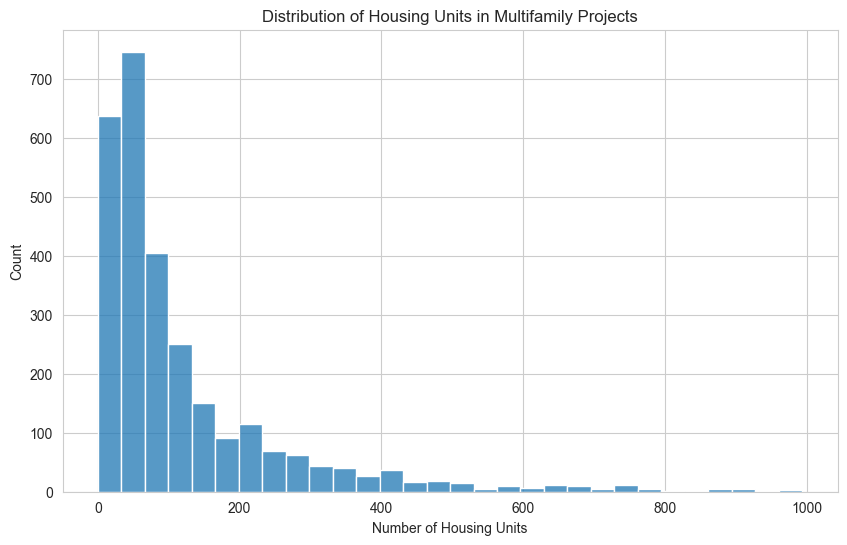

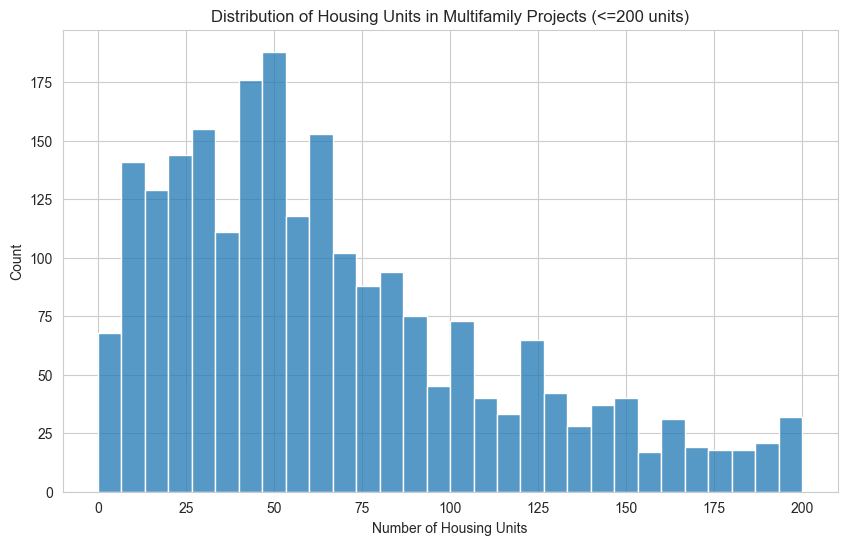

In [88]:
print(f"Maximum housing units: {multifamily_df['housing_units'].max()}")
# Set housing_units to NaN for unrealistically large values (>5000)
multifamily_df.loc[multifamily_df['housing_units'] > 5000, 'housing_units'] = float('nan')


# histogram of housing units
plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['housing_units'] <= 1000], x='housing_units', bins=30)
plt.title('Distribution of Housing Units in Multifamily Projects')
plt.xlabel('Number of Housing Units')
plt.ylabel('Count')
plt.show()

# Second histogram zoomed into projects with less than 200 units
plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['housing_units'] <= 200], x='housing_units', bins=30)
plt.title('Distribution of Housing Units in Multifamily Projects (<=200 units)')
plt.xlabel('Number of Housing Units')
plt.ylabel('Count')
plt.show()


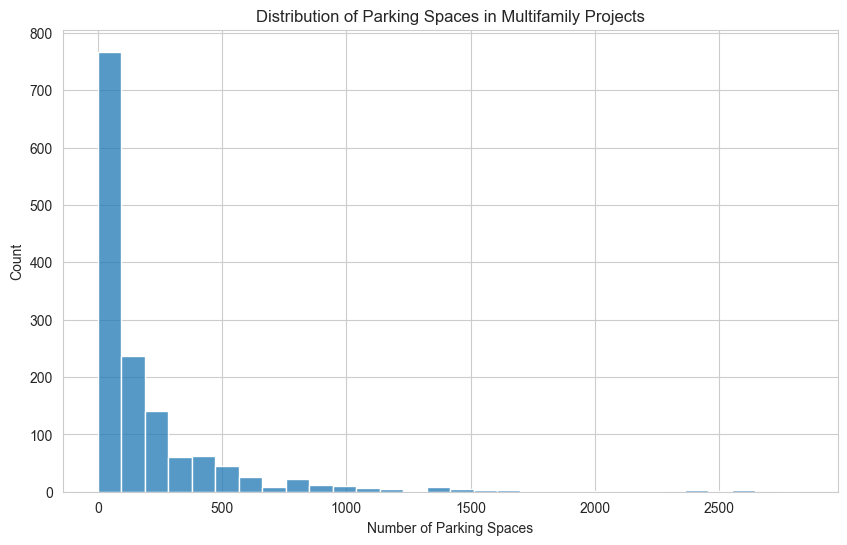

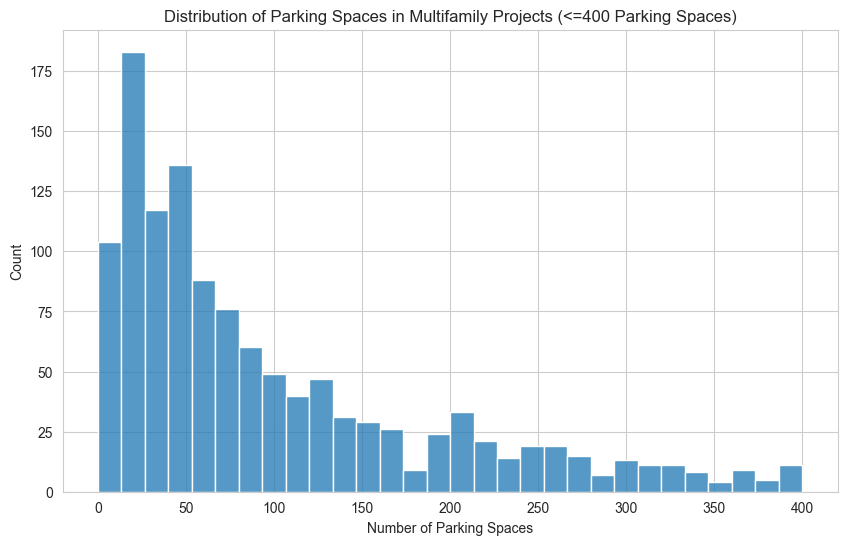

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['Parking spaces'] <= 3000], x='Parking spaces', bins=30)
plt.title('Distribution of Parking Spaces in Multifamily Projects')
plt.xlabel('Number of Parking Spaces') 
plt.ylabel('Count')
plt.show()

# histogram of parking spaces - zoomed to <=1000
plt.figure(figsize=(10, 6))
sns.histplot(data=multifamily_df[multifamily_df['Parking spaces'] <= 400], x='Parking spaces', bins=30)
plt.title('Distribution of Parking Spaces in Multifamily Projects (<=400 Parking Spaces)')
plt.xlabel('Number of Parking Spaces') 
plt.ylabel('Count')
plt.show()




In [73]:
missing_counts = multifamily_df[['housing_units', 'Parking spaces', 'Developer', 'Architect']].isna().sum()
# missing_both = multifamily_df[multifamily_df['# of apartments'].isna() & multifamily_df['# of condos'].isna()]

print("Number of multifamily projects missing information:")
for field, count in missing_counts.items():
    print(f"{field}: {count} projects")
# print(f"Nnumber of apartments and number of condos: {len(missing_both)}")


Number of multifamily projects missing information:
housing_units: 175 projects
Parking spaces: 1554 projects
Developer: 188 projects
Architect: 580 projects
Nnumber of apartments and number of condos: 175


In [ ]:
multifamily_df.shape

(3001, 49)

In [86]:
merged_df.to_csv('merged_data.csv', index=False)
# merged_df.to_stata('merged_data.dta', write_index=False)

In [87]:
multifamily_df.to_csv('multifamilyonly_merged_data.csv', index=False)
